In [1]:
#install scikit-learn-extra to import KMedoids class
!pip install scikit-learn-extra
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import pandas as pd
data=pd.read_csv('Country-data.csv')

In [2]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
data.duplicated().sum()

0

### correlation matrix to see correlation between attributes

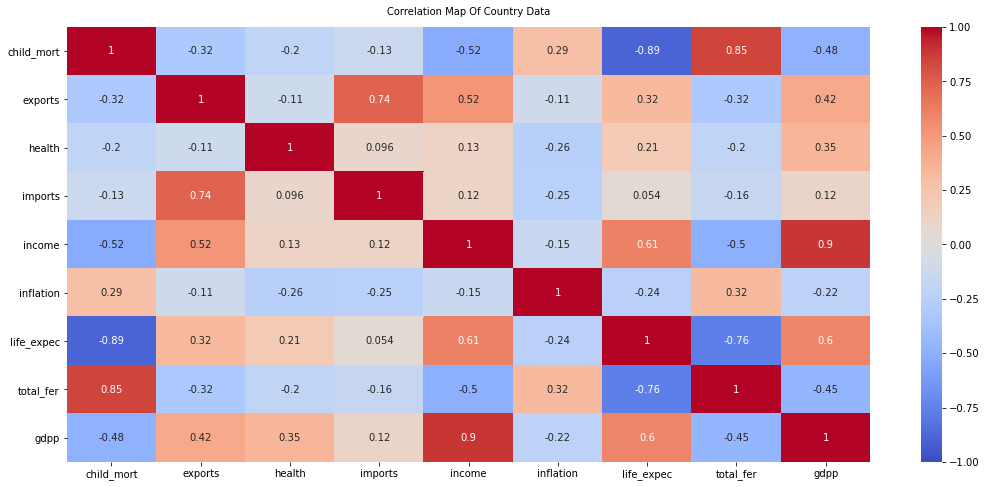

In [5]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
plt.title('Correlation Map Of Country Data', fontdict={'fontsize':10}, pad=12);

##  I can define the top 2 highest positive correlation score:

### gdpp and income with 0.9 
### total_fer and child_mort with 0.85
###  << (if they increases then the it will be( developed country)if they decrease then will be (not developed)) >>

### child_mort and life_expec with -0.89 (NEGATIVE CORR)


###  i donot take them because they have the same effect in data but i can take one of them and another important feature to see their effect on clustering our data.


In [6]:
data=data.drop(['country'], axis=1)
cluster = KMedoids(n_clusters=3, metric="manhattan",init="random") #random_state=33
cluster.fit_predict(data)

array([2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2], dtype=int64)

In [7]:
data['cluster']=cluster.labels_
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [8]:
data['cluster'].value_counts()

2    87
0    49
1    31
Name: cluster, dtype: int64

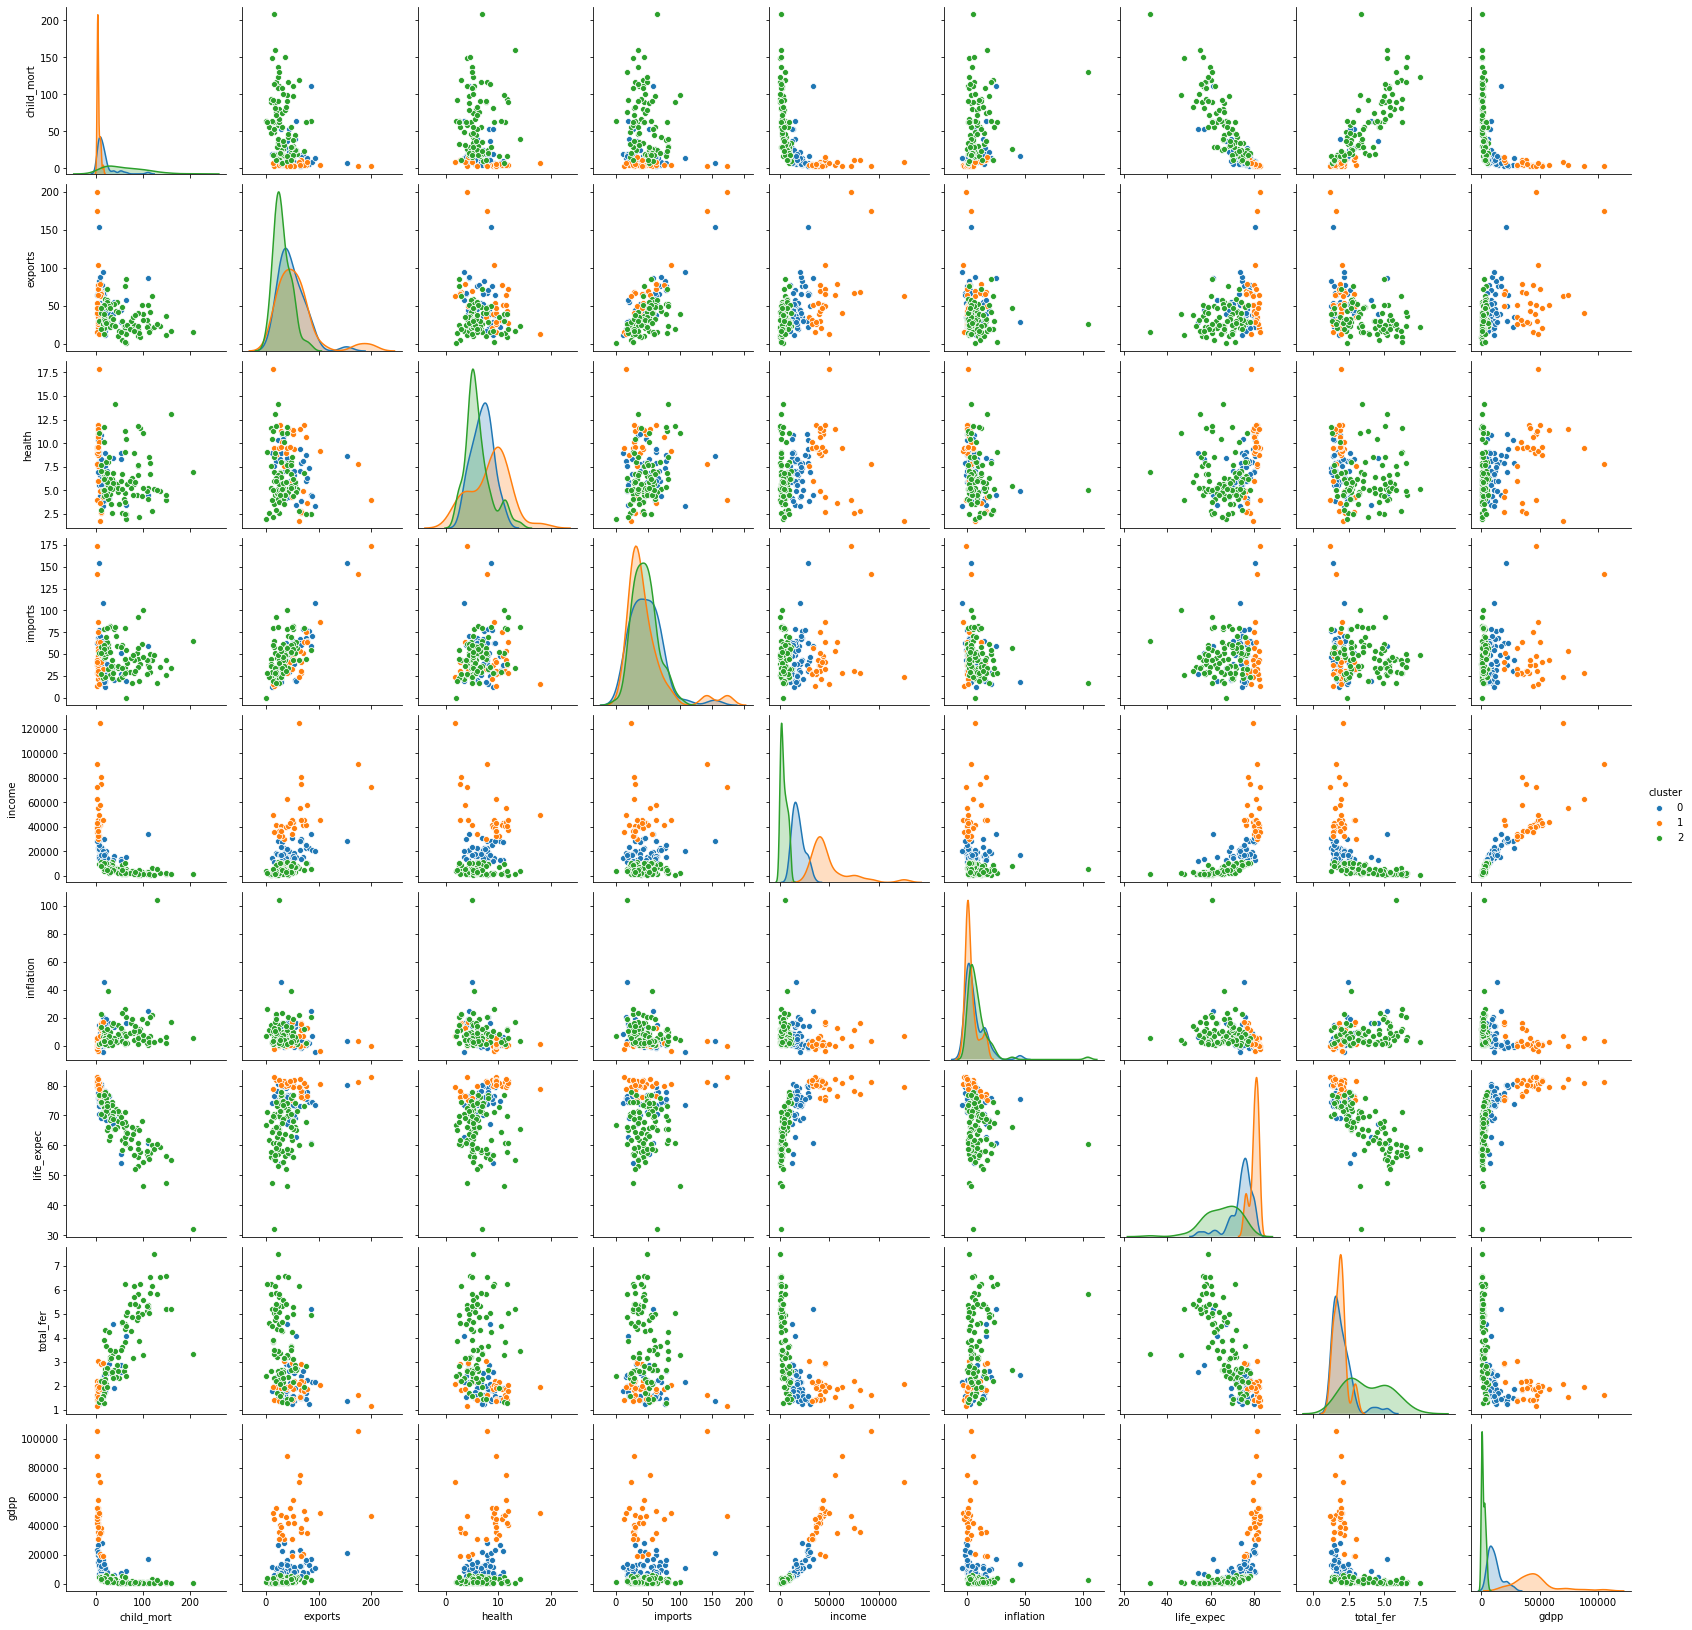

In [9]:
sns.pairplot(data, hue='cluster')

### cluster 0: in most categories countries fall somewhere in between cluster 1 and cluster 2

## cluster 1:
1. lowest children mortality

2. highest income

3. highest life expectancy

4. lowest total fertility

5. highest GDPP

## cluster 2:
1. highest children mortality

2. lowest income

3. lowest life_expectancy

4. highest total fertility

5. lowest GDPP 



## This analysis leads me to believe that we can name these clusters as:

- cluster 2 - least developed countries
- cluster 0 - moderately developed countries
- cluster 1 - highly developed countries

## K-MEDOID_CLUSTERING

lets make our clustering between 2 important features >> moderate negative correlation between them

1.child_mort

2.income 

In [10]:
cdata=data.drop(['cluster'],axis=1)

In [11]:
cdata

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [12]:
cdata=data.loc[:,['child_mort','income']]

In [13]:
cdata

,child_mort,income
0,90.2,1610
1,16.6,9930
2,27.3,12900
3,119.0,5900
4,10.3,19100
...,...,...
162,29.2,2950
163,17.1,16500
164,23.3,4490
165,56.3,4480


In [16]:
#create object from KMedoids class
cluster1 = KMedoids(n_clusters=3, metric="manhattan",init="random") #random_state=33
cluster1.fit_predict(cdata)

array([1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

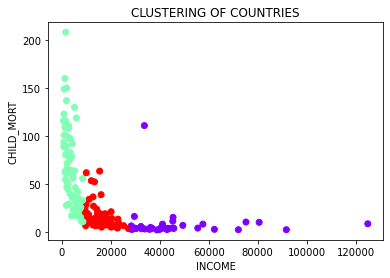

In [17]:
#scattering data
plt.scatter(cdata['income'], cdata['child_mort'], c=cluster1.labels_, cmap='rainbow')
plt.title('CLUSTERING OF COUNTRIES')
plt.xlabel('INCOME')
plt.ylabel('CHILD_MORT')
plt.show()

In [18]:
preds = cluster1.labels_
kmedoid = pd.DataFrame(cdata)
kmedoid['KMedoid_Clusters'] = preds
kmedoid.head(10)

,child_mort,income,KMedoid_Clusters
0,90.2,1610,1
1,16.6,9930,2
2,27.3,12900,2
3,119.0,5900,1
4,10.3,19100,2
5,14.5,18700,2
6,18.1,6700,1
7,4.8,41400,0
8,4.3,43200,0
9,39.2,16000,2


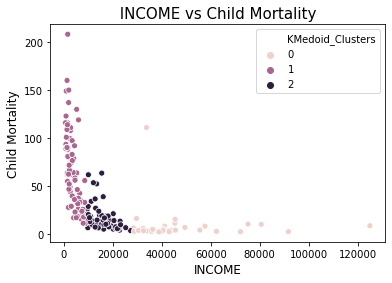

In [20]:
sns.scatterplot(cdata['income'],cdata['child_mort'],hue='KMedoid_Clusters',data=cdata) 
plt.title(" INCOME vs Child Mortality ", fontsize=15)
plt.xlabel("INCOME", fontsize=12)
plt.ylabel("Child Mortality", fontsize=12)
plt.show()

### Cluster 0 >> high developed country 
### Cluster1>> low developed country 
### Cluster 2>> moderate  developed (between them)

## HIRERACHICAL CLUSTERING

In [21]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [37]:
data2=data.iloc[30:100]
data2=data2.drop(['cluster'], axis=1)

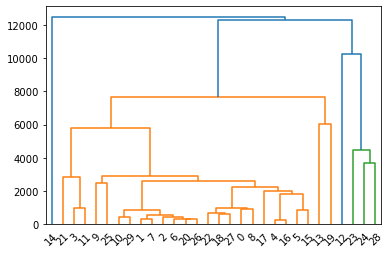

In [38]:
# DENDROGRAM for all data 
dendrogram=sch.dendrogram(sch.linkage(data2[:30],'single'))

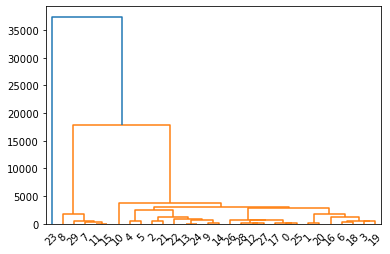

In [26]:
# dendrogram of our 2 selected feature
dendrogram=sch.dendrogram(sch.linkage(cdata[:30],'single'))

In [27]:
hcluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
hcluster.fit_predict(cdata)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

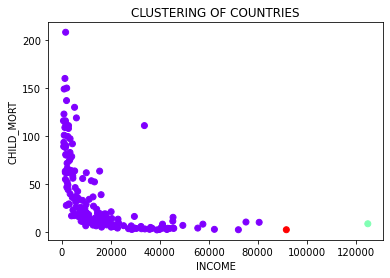

In [28]:
# Scatter plot to visualize data
plt.scatter(cdata['income'],cdata['child_mort'], c=hcluster.labels_,cmap='rainbow')
plt.title('CLUSTERING OF COUNTRIES')
plt.xlabel('INCOME')
plt.ylabel('CHILD_MORT')
plt.show()

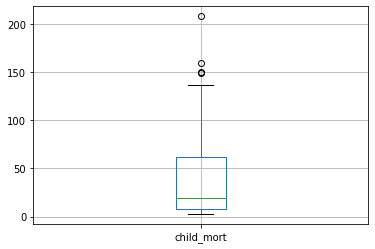

In [29]:
b1=cdata.boxplot(column=['child_mort'])

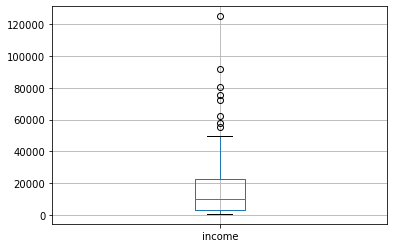

In [30]:
b1=cdata.boxplot(column=['income'])

###  As we know that Single linkage is sensitive to noise data  or (OUTLIERS ) so it doesnot work well in data with outlieres.
## 'single' linkage dosenot cluster the data perfectly.
## so we can try 'ward' linkage and see ..'

Text(0, 0.5, 'CHILD_MORT')

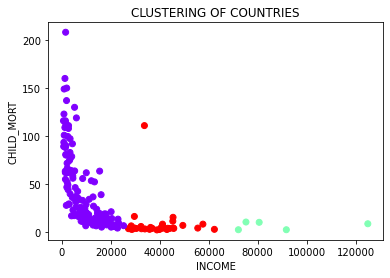

In [31]:
hcluster2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hcluster2.fit_predict(cdata)
plt.scatter(cdata['income'],cdata['child_mort'], c=hcluster2.labels_,cmap='rainbow')
plt.title('CLUSTERING OF COUNTRIES')
plt.xlabel('INCOME')
plt.ylabel('CHILD_MORT')

### The Ward linkage work good in clustering our data 